## Data science process: CRISP-DM

**_Business Understanding:_**
Description of King County, USA
    King County is a vibrant community in Seattle, Washington. It has residents that represent countries from around the world.  It is named after Martin Luther King Jr., one of the most influential civil rights leaders in USA's history. 
    King County has adopted a pro-equity agenda aimed at advancing regional change and is developing the systems and standards necessary to achieve better outcomes for all it's residents, regardless of their race or income.All of these qualities seek to make King County one of the best places to live, work, and play in the USA.

    References: 
    'https://kingcounty.gov/en/legacy/audience/employees/careers', 

stakeholders in this project:
    families with increasing family size looking for bigger living spaces for their children
    young invdividuals going into King county starting off in employment after completing college
    housing agents looking for houses for their clients
    home owners looking for ways to get the best offers for their investments

 Business problem(s):
     To provide a comprehensive understanding of factors influencing housing prices in King County. 
     The aim is to provide insights that support informed decision-making by home owners and potential home owners in their efforts to get equitable housing solutions across different neighborhoods.

- What problems are inside the scope of this project?
- What problems are outside the scope of this project?

Data sources
    King County House Sales dataset

Expected timelines
    one week 13th to 19th July 2024 

## Data Understanding

To understand the dataset we are working on, we first import necessary libraries and then load dataset to have a view of the few rows of the dataset.

In [1]:
# import the necessary li#import libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import itertools
from numbers import Number
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from scipy import stats


Loading the data

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Description

King County dataset:
- Contains: 21 variables/columns and 
            21,597 records/rows

Variables/ Column names:


* id	- Unique identifier for a house
* date - Date house was sold
* price - Sale price (prediction target)
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms
* sqft_living - Square footage of living space in the home
* sqft_lot - Square footage of the lot
* floors - Number of floors (levels) in house
* waterfront - Whether the house is on a waterfront
* view - Quality of view from house
* condition	-	How good the overall condition of the house is. Related to maintenance of house
* grade - Overall grade of the house. Related to the construction and design of the house
* sqft_above - Square footage of house apart from basement
* sqft_basement - Square footage of the basement
* yr_built - Year when house was built
* yr_renovated - Year when house was renovated
* zipcode - ZIP Code used by the United States Postal Service
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Describing the shape of dataset

In [5]:
print("No: of rows is", df.shape[0])
print('No: of  columns is ', df.shape[1])

No: of rows is 21597
No: of  columns is  21


### Data preparation

Data preparation is a critical step in the data analysis process, involving the cleaning, transforming, and organizing of raw data to make it suitable for analysis. Proper data preparation ensures that the data is accurate, consistent, and formatted correctly, which is essential for building reliable and valid models


In [6]:
#running the first five rows of each column 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
#bathroom is a float, Rounding of the bathroom data to whole number.
df["bathrooms"] = df.bathrooms.round()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.0,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.0,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,1.0,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.0,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [8]:
# Date is an object, changing the date collumn to date type.
df['date'] = pd.to_datetime(df['date'])

# sqft_basement is an object, changing the collumn to numeric type
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [9]:
#getting the statistical summary of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.059777,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.754435,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# unique values for categorical features

print(df['waterfront'].value_counts())
print(df['view'].value_counts())
print(df['condition'].value_counts())
print(df['grade'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64


In [11]:
# #detecting missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

we have three column with null value:
 - waterfront 2,376
 - view 64
 - yr of renovation

In [12]:
# # assessing the waterfront category
df["waterfront"].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [13]:
#filling the missing value of waterfront with 0 for no waterfront
df["waterfront"]=df["waterfront"].fillna(0)

In [14]:
# # assessing the waterfront category
df["waterfront"].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [15]:
#filling the missing value of sqft_basement with 0 for no sqft_basement
df["sqft_basement"]=df["sqft_basement"].fillna(0)

In [16]:
# # assessing the waterfront category
df["sqft_basement"].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [17]:
# # assessing the view category
df["view"].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [18]:
#filling the missing value of waterfront with 1 for no waterfront
df["view"]=df["view"].fillna(5)

In [19]:
#converting the view column to categorical
df["view"] = df["view"].astype('category')

In [20]:
#Renaming the categories
df["view"] = df["view"].cat.set_categories([0, 1, 2, 3, 4, 5])
df["view"].cat.rename_categories({0: 'No view', 1: 'Poor view', 2: 'Average view', 3: 'Good view', 4: 'Excellent view',5: 'Unknown'}, inplace=True)

print(df["view"].value_counts())

No view           19422
Average view        957
Good view           508
Poor view           330
Excellent view      317
Unknown              63
Name: view, dtype: int64


In [21]:
# #detecting missing values after filling the null above
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [22]:
#checkingfor duplicate rows
df.duplicated().sum()

0

In [23]:
#removing unneccesary columns.
df.drop(['id','date','zipcode'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0.0,No view,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.0,2570,7242,2.0,0.0,No view,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0.0,No view,3,6,770,0.0,1933,NaN,47.7379,-122.233,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0.0,No view,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0.0,No view,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503


# Multivariate Analysis 2

In [24]:
# Computing correlation matrix
corr_matrix = df.corr()

# Extract the correlations with 'price' and sort in descending order
price_relation = corr_matrix["price"].sort_values(ascending=False)
print(price_relation)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.519628
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
Name: price, dtype: float64


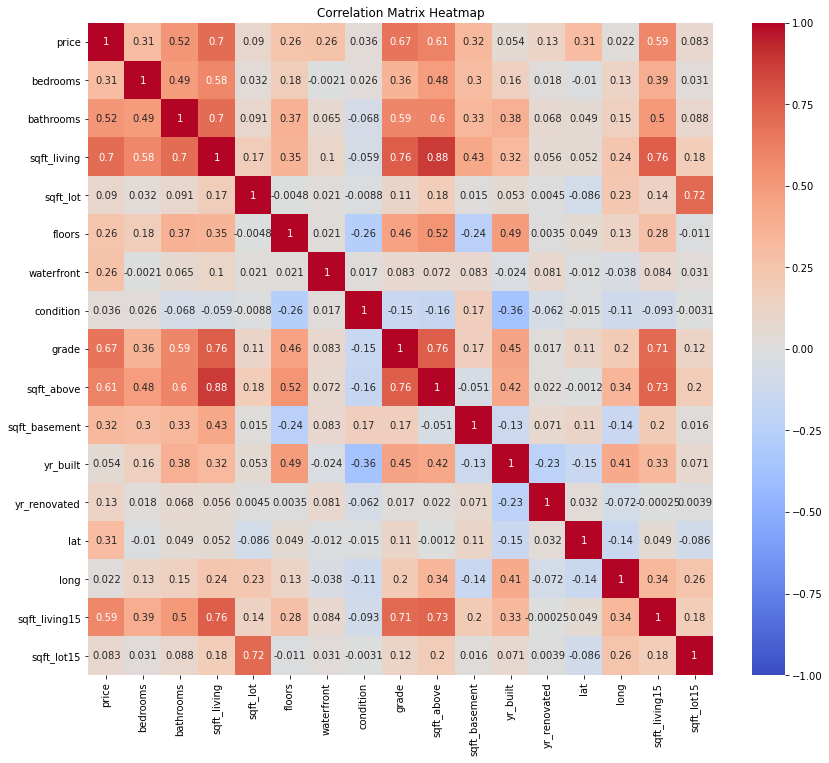

In [25]:
# Correlation heatmap of columns

correlation_matrix =  df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
# Exctracting relevant column for the analysis, all variables with correlation above 0.25 

rel_2_columns = ["price", "bathrooms", "sqft_living","grade", "sqft_above", "sqft_living15", "sqft_basement", "bedrooms", "waterfront", "floors"]

# loading the columns to a dataframe for analysis
rel_2_df = df[rel_2_columns] 
rel_2_df.head(20)

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15,sqft_basement,bedrooms,waterfront,floors
0,221900.0,1.0,1180,7,1180,1340,0.0,3,0.0,1.0
1,538000.0,2.0,2570,7,2170,1690,400.0,3,0.0,2.0
2,180000.0,1.0,770,6,770,2720,0.0,2,0.0,1.0
3,604000.0,3.0,1960,7,1050,1360,910.0,4,0.0,1.0
4,510000.0,2.0,1680,8,1680,1800,0.0,3,0.0,1.0
5,1230000.0,4.0,5420,11,3890,4760,1530.0,4,0.0,1.0
6,257500.0,2.0,1715,7,1715,2238,0.0,3,0.0,2.0
7,291850.0,2.0,1060,7,1060,1650,0.0,3,0.0,1.0
8,229500.0,1.0,1780,7,1050,1780,730.0,3,0.0,1.0
9,323000.0,2.0,1890,7,1890,2390,0.0,3,0.0,2.0


In [27]:
# Statistical view to confirm the outliers plotted above
#df.describe()
min_max_summary = df.agg(['min', 'max'])
min_max_summary

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
min,78000.0,1,0.0,370,520,1.0,0.0,1,3,370,0.0,1900,0.0,47.1559,-122.519,399,651
max,7700000.0,33,8.0,13540,1651359,3.5,1.0,5,13,9410,4820.0,2015,2015.0,47.7776,-121.315,6210,871200


In [28]:
# we now remove outliers from our data - rel_2
for feature in rel_2_df:
    Q1 = rel_2_df[feature].quantile(0.25)
    Q3 = rel_2_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = rel_2_df[(rel_2_df[feature] >= lower_bound) & (rel_2_df[feature] <= upper_bound)]

# Verify the changes
print(rel_2_df.info())
print(rel_2_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   grade          21597 non-null  int64  
 4   sqft_above     21597 non-null  int64  
 5   sqft_living15  21597 non-null  int64  
 6   sqft_basement  21597 non-null  float64
 7   bedrooms       21597 non-null  int64  
 8   waterfront     21597 non-null  float64
 9   floors         21597 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.6 MB
None
              price     bathrooms   sqft_living         grade    sqft_above  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   5.402966e+05      2.059777   2080.321850      7.657915   1788.596842   
std    3.673681e+05      0.754435    918.106125      1.173200    827.75

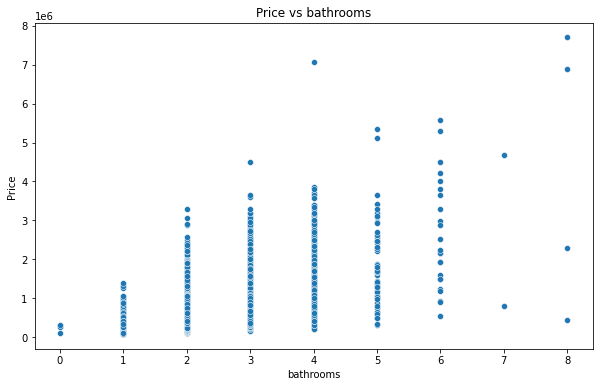

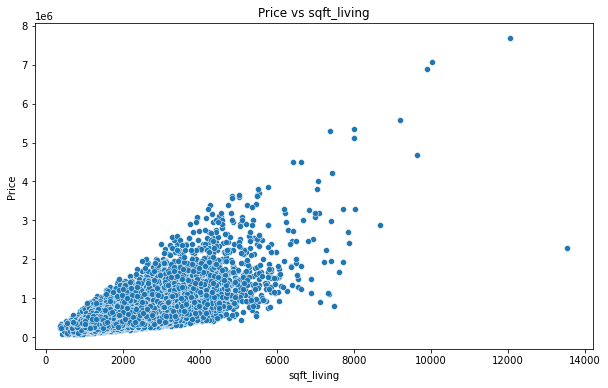

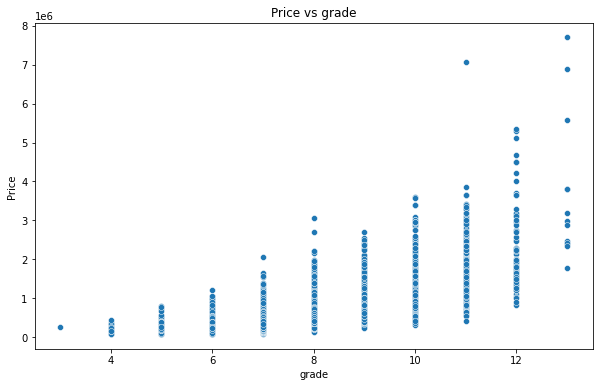

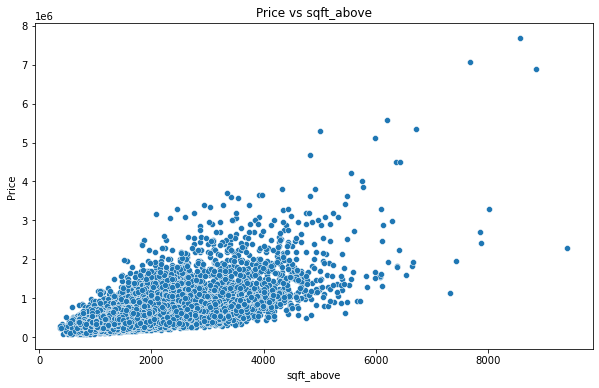

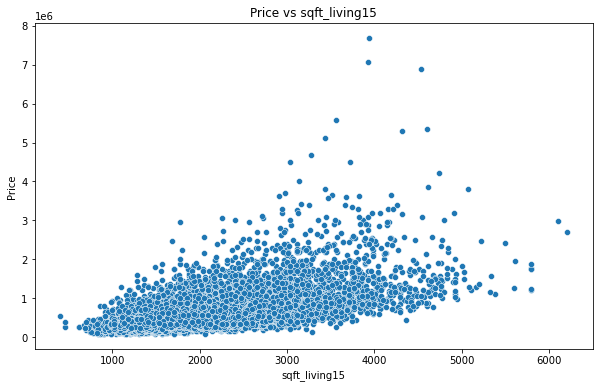

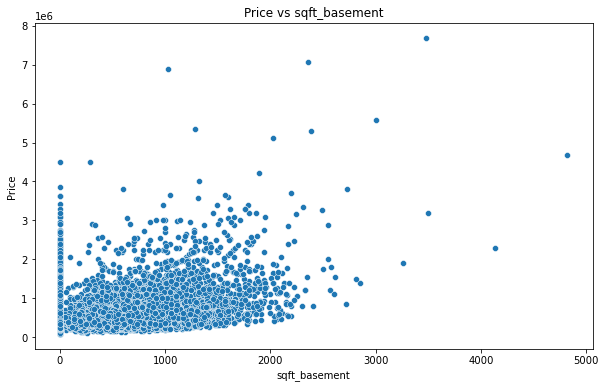

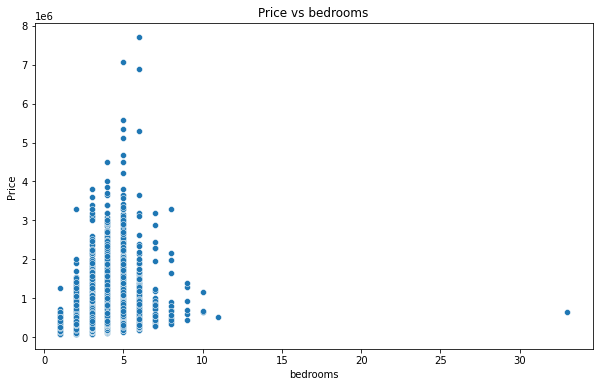

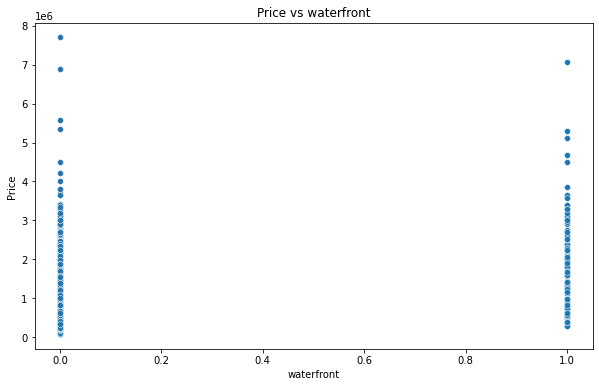

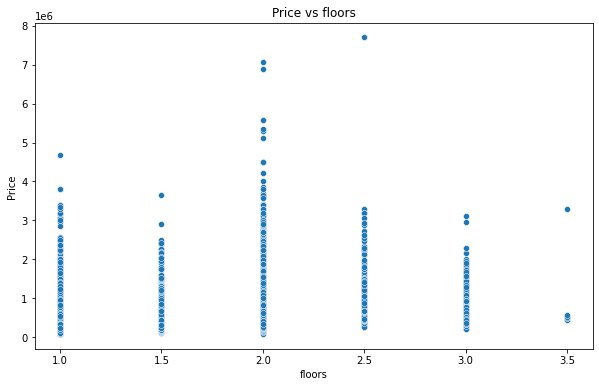

In [29]:
# we now create scatter plots for each feature against price - rel 2
for feature2 in rel_2_columns[1:]:  # Skip 'price' itself
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=rel_2_df, x=feature2, y="price")
    plt.title(f"Price vs {feature2}")
    plt.xlabel(feature2)
    plt.ylabel("Price")
    plt.show()

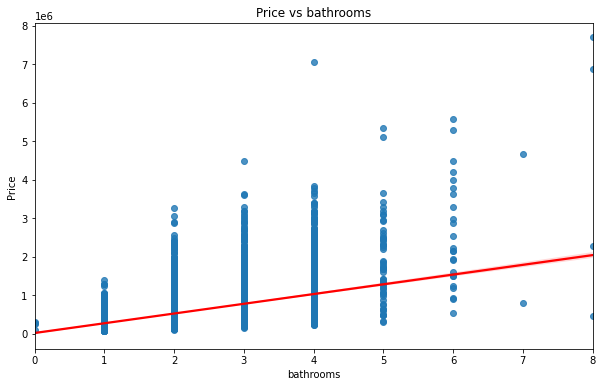

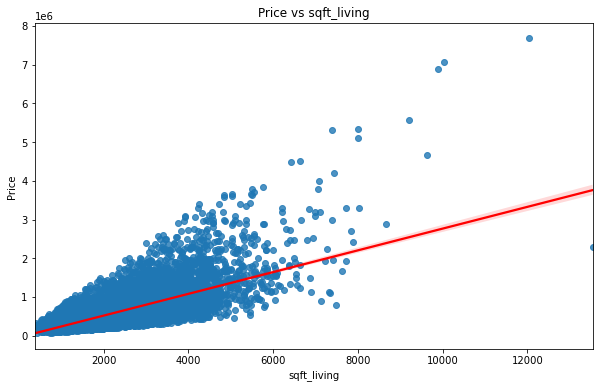

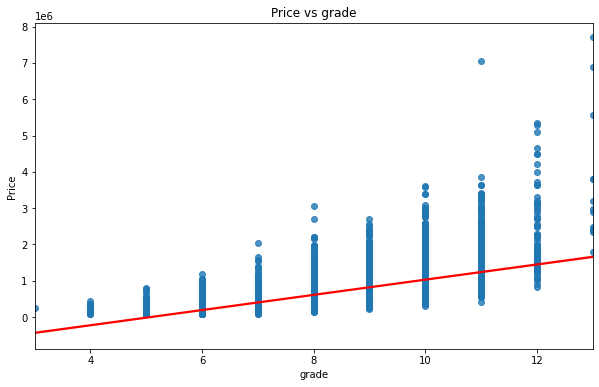

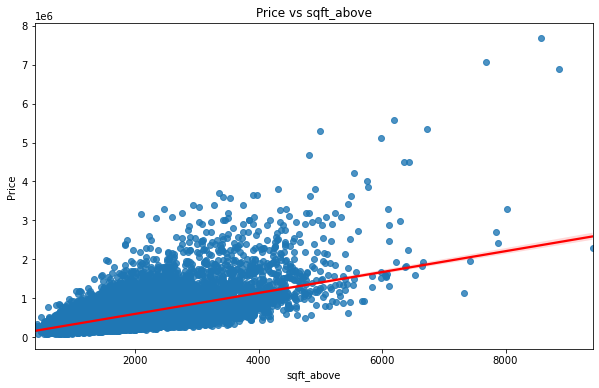

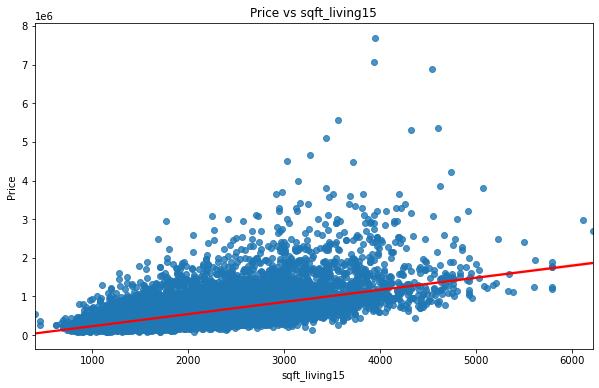

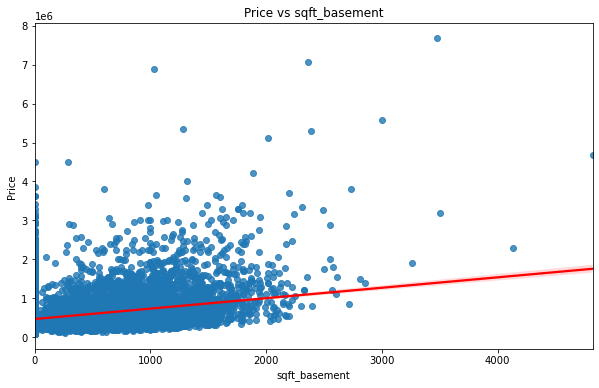

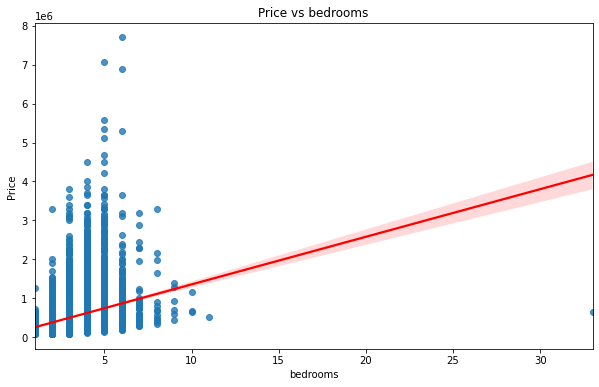

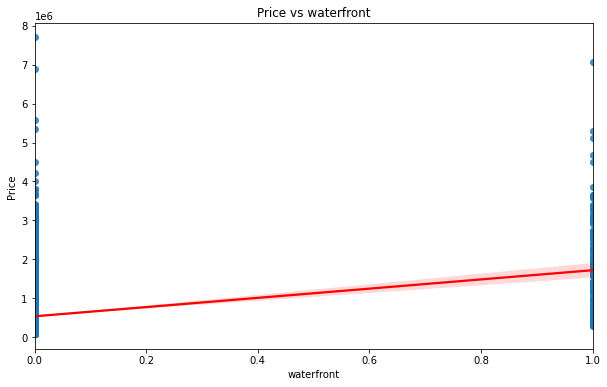

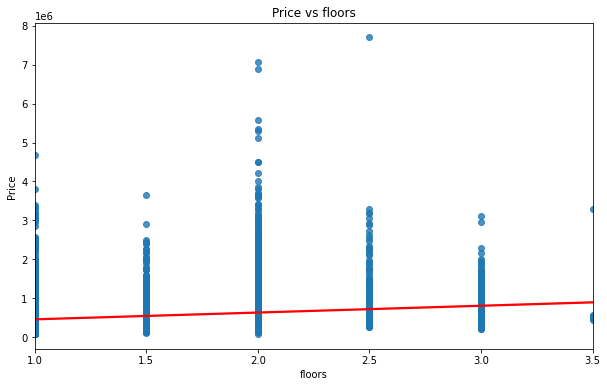

In [30]:

for feature2 in rel_2_columns[1:]:  # Skip 'price' itself
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=feature2, y="price", line_kws={"color":"red"})
    plt.title(f"Price vs {feature2}")
    plt.xlabel(feature2)
    plt.ylabel("Price")
    plt.show()

## Modelling 2

In [31]:
# setting up our variables before we split data for training our model
x = rel_2_df[rel_2_columns[1:]]  # these are the independent variables
y = rel_2_df["price"]  # This is the dependent variable

# We now split the data into training and test sets at 80% for training and at 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Verify the split
print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Test data shape: {x_test.shape}, {y_test.shape}")

Training data shape: (17277, 9), (17277,)
Test data shape: (4320, 9), (4320,)


In [32]:
# Creating and training the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 54882269588.83429
R^2 Score: 0.5891093609957851


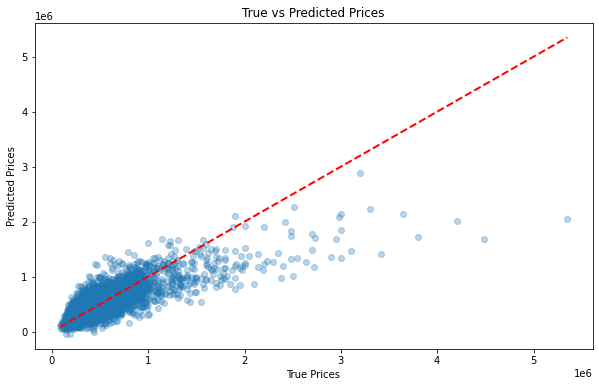

In [36]:
# Plotting the true vs predicted prices to see how strong our model is
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()

## Regression 2

In [33]:
# Print summary statistics for the target variable
summary_stats = rel_2_df['price'].describe()
print("\nSummary statistics for house prices:")
print(summary_stats)

# Calculate and print variance
variance = rel_2_df['price'].var()
print(f"Variance of house prices: {variance}")


Summary statistics for house prices:
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
Variance of house prices: 134959350361.55782


In [34]:
# Creating a function that will take in a user input of the prefered house and predict the house price

def house_price_estimation(model):
    print("Enter the following details to get an estimated house price:")
    bathrooms = int(input("Number of bathrooms: "))
    sqft_living = int(input("Square footage of the living area: "))
    grade = int(input("Grade (1-13, where 13 is the best): "))
    sqft_above = int(input("Square footage above ground: "))
    sqft_living15 = int(input("Square footage of living space for the nearest 15 neighbors: "))
    sqft_basement = int(input("Square footage of basement"))
    bedrooms = int(input("Number of bedrooms"))
    waterfront = int(input("Presence of waterfront: 1, No waterfront: 0"))
    floors = int(input("Number of floors"))
    
    # We then create a DataFrame with the keyed in prefered feautures
    input_data = pd.DataFrame({
        'bathrooms': [bathrooms],
        'sqft_living': [sqft_living],
        'grade': [grade],
        'sqft_above': [sqft_above],
        'sqft_living15': [sqft_living15],
        'sqft_basement': [sqft_basement],
        'bedrooms': [bedrooms],
        'waterfront': [waterfront],
        'floors': [floors]
    })
    
    # Predicting price of the house
    estimated_price = model.predict(input_data)[0]
    
    print(f"Estimated house price: ${estimated_price:,.2f}")

# Call the function to get user input and predict house price
house_price_estimation(model)

# sample data: bathrooms = 4, qft_living = 5420, grade = 11, sqft_above = 3890, sqft_living15 = 4760, sqft_basement = 1530, bedrooms = 4, waterfront = 0, floors = 1
# Actual price = 1,230,000/=

Enter the following details to get an estimated house price:
Estimated house price: $1,577,782.97


In [35]:
# Defining the MSE scorer
mse_scorer = make_scorer(mean_squared_error)

# Performing a 5-fold cross-validation for each of our feature
cv_scores = cross_val_score(model, x, y, cv=5, scoring=mse_scorer)

# Print out the cross-validation results
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Mean Cross-Validation MSE: {np.mean(cv_scores)}")
print(f"Standard Deviation of Cross-Validation MSE: {np.std(cv_scores)}")

Cross-Validation MSE Scores: [6.14777893e+10 5.95506283e+10 5.10783367e+10 5.47880529e+10
 5.61231742e+10]
Mean Cross-Validation MSE: 56603596283.839806
Standard Deviation of Cross-Validation MSE: 3646868589.08195


#### Given the following results for model 2

* Test Set MSE: 54,882,269,588.83429
* R² Score: 0.589
* Cross-Validation MSE Scores: [61,477,789,300 59,550,628,300 51,078,336,700 54,788,052,900 56,123,174,200]
* Mean Cross-Validation MSE: 56,603,596,283.839806
* Standard Deviation of Cross-Validation MSE: 36,46,868,589.08195
* Variance of House Prices: 134,959,350,361.56